# Documentary vs Comedy Movies Average Ratings for the years [ 1960 - 2015]

## Introduction:

We will be using a dataset from MovieLens Website.
    
Here are the links to the data source and location:

-  __Data Source:__ MovieLens web site (filename: ml-20m.zip)
-  __Location:__ https://grouplens.org/datasets/movielens/

This Dataset contains data of movie title, genres, rating out of 5 and also have tags for each movie.

## Objective:

Our Aim is to see how **Documentary Movies** perform with respect to  **Comedy Movies** over the years.
This will also give us insights whether comedy or documentary movies are liked more by people over the years.
    

    
    

In [39]:
!ls ./movielens

Icon?             genome-scores.csv links.csv         ratings.csv
README.txt        genome-tags.csv   movies.csv        tags.csv


In [40]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [41]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.shape

(27278, 3)

In [42]:
bool = movies['genres'].str.contains('Comedy')
doc = movies[bool]
doc.describe()

,movieId
count,8374.000000
mean,55558.661452
std,44913.874889
min,1.000000
25%,6069.500000
50%,56064.500000
75%,98127.250000
max,131256.000000


In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [45]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

## Extracting the year from the title and appending it as a new column

In [46]:
movies['year'] = movies['title'].str.extract('.*\((\d*)\).*', expand = True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Getting the average rating for each movie in average_ratings dataframe:

In [47]:
average_ratings = ratings[['movieId','rating']].groupby('movieId', as_index = False).mean()
average_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


## Merging the average ratings for each movie with the Movies Dataframe

In [48]:
movies_rating = movies.merge(average_ratings, on = 'movieId', how = 'inner')
movies_rating.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [49]:
movies_rating['rating'].isnull().any()

False

## Splitting Genres:
Since each movie has been tagged with multiple genres, we split the genres for each movie and tag it with that movie in different rows. This helps us to categorise movies based on single genre.

In [50]:
split_genres = movies_rating['genres'].str.split('|').apply(Series, 1).stack()
split_genres.head()

0  0    Adventure
   1    Animation
   2     Children
   3       Comedy
   4      Fantasy
dtype: object

In [51]:
split_genres.index = split_genres.index.droplevel(-1) 
split_genres.head()



0    Adventure
0    Animation
0     Children
0       Comedy
0      Fantasy
dtype: object

In [52]:
split_genres.name = 'genre' 
split_genres.head()

0    Adventure
0    Animation
0     Children
0       Comedy
0      Fantasy
Name: genre, dtype: object

In [53]:
complete_movies = movies_rating.join(split_genres)
complete_movies.head()

,movieId,title,genres,year,rating,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.92124,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.92124,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.92124,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.92124,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.92124,Fantasy


In [54]:
complete_movies.shape

(53419, 6)

In [55]:
unique = complete_movies['genre'].unique().tolist()
unique

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 '(no genres listed)']

### Removing (no genres listed) from genre column

In [56]:
bool_no_genre = complete_movies['genre'].str.contains('no genres listed')
complete_movies = complete_movies.drop(complete_movies[bool_no_genre].index)

In [57]:
complete_movies.shape


(53177, 6)

In [58]:
unique = complete_movies['genre'].unique().tolist()
unique

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir']

In [59]:
unique_year = complete_movies['year'].unique().tolist()
unique_year

['1995',
 '1994',
 '1996',
 '1976',
 '1992',
 '1988',
 '1967',
 '1993',
 '1964',
 '1977',
 '1965',
 '1982',
 '1985',
 '1990',
 '1991',
 '1989',
 '1937',
 '1940',
 '1969',
 '1981',
 '1973',
 '1970',
 '1960',
 '1955',
 '1959',
 '1968',
 '1980',
 '1975',
 '1986',
 '1948',
 '1943',
 '1950',
 '1946',
 '1987',
 '1997',
 '1974',
 '1956',
 '1958',
 '1949',
 '1972',
 '1998',
 '1933',
 '1952',
 '1951',
 '1957',
 '1961',
 '1954',
 '1934',
 '1944',
 '1963',
 '1942',
 '1941',
 '1953',
 '1939',
 '1947',
 '1945',
 '1938',
 '1935',
 '1936',
 '1926',
 '1932',
 '1979',
 '1971',
 '1978',
 '1966',
 '1962',
 '1983',
 '1984',
 '1931',
 '1922',
 '1999',
 '1927',
 '1929',
 '1930',
 '1928',
 '1925',
 '1914',
 '2000',
 '1919',
 '1923',
 '1920',
 '1918',
 '1921',
 '2001',
 '1924',
 '2002',
 '2003',
 '1915',
 '2004',
 '1916',
 '1917',
 '2005',
 '2006',
 '1902',
 nan,
 '1903',
 '2007',
 '2008',
 '2009',
 '1912',
 '2010',
 '1913',
 '2011',
 '1898',
 '1899',
 '1894',
 '2012',
 '1909',
 '1910',
 '1901',
 '2013',
 '18

## Dropping NA Values in the year column

In [60]:
complete_movies.isnull().any()

movieId    False
title      False
genres     False
year        True
rating     False
genre      False
dtype: bool

In [61]:
complete_movies = complete_movies.dropna()

In [62]:
complete_movies.isnull().any()

movieId    False
title      False
genres     False
year       False
rating     False
genre      False
dtype: bool

In [63]:
complete_movies.shape

(53156, 6)

## Converting year to datetime:

In [64]:
complete_movies['year'] = pd.to_datetime(complete_movies['year'])

In [65]:
complete_movies.head()

,movieId,title,genres,year,rating,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995-01-01,3.92124,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995-01-01,3.92124,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995-01-01,3.92124,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995-01-01,3.92124,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995-01-01,3.92124,Fantasy


## Extracting just the year:

In [66]:
complete_movies['year'] = complete_movies['year'].dt.year

In [67]:
complete_movies['year'].dtypes

dtype('int64')

## Retaining important columns needed for analysis

In [68]:
complete_movies = complete_movies[['year','rating','genre']]
complete_movies.head()

,year,rating,genre
0,1995,3.92124,Adventure
0,1995,3.92124,Animation
0,1995,3.92124,Children
0,1995,3.92124,Comedy
0,1995,3.92124,Fantasy


#  Movie data from 1960 to 2015:

We are considering movie data from 1960 to 2015 because this dataset contains ratings data only for all years from 1960 to 2015 for both documentaries and comedy movies

In [69]:
mask1 = complete_movies['year'] >= 1960
complete_movies = complete_movies[mask1]

In [70]:
# last_10.head()

## Function to get genre average rating per year

In [71]:
def rating_by_year(genre):
    bool = complete_movies['genre'].str.contains(genre)
    genre_movies = complete_movies[bool]
    genre_rating = genre_movies[['year','rating']].groupby('year', as_index = False).mean()
    return genre_rating

## Comedy  movies average ratings per year

In [72]:
comedy_ratings = rating_by_year('Comedy')
comedy_ratings.head()

,year,rating
0,1960,3.071401
1,1961,3.211768
2,1962,3.125381
3,1963,3.274110
4,1964,3.245539


## Documentaries average ratings per year

In [73]:
documentary_ratings = rating_by_year('Documentary') #Documentary 1960
print(comedy_ratings.describe())
print(documentary_ratings.describe())


              year     rating
count    56.000000  56.000000
mean   1987.500000   3.080976
std      16.309506   0.116633
min    1960.000000   2.827056
25%    1973.750000   3.010539
50%    1987.500000   3.074727
75%    2001.250000   3.164458
max    2015.000000   3.311274
              year     rating
count    56.000000  56.000000
mean   1987.500000   3.451582
std      16.309506   0.202077
min    1960.000000   2.821429
25%    1973.750000   3.366520
50%    1987.500000   3.450604
75%    2001.250000   3.537306
max    2015.000000   3.954674


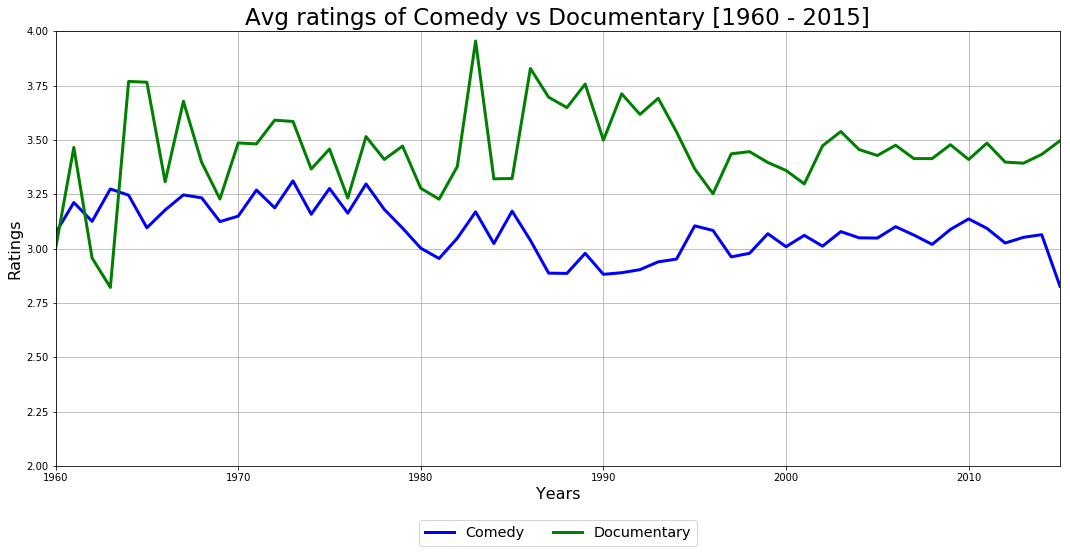

In [74]:

fig, ax = plt.subplots(figsize=(18, 8))

plt.plot(comedy_ratings['year'].values, comedy_ratings['rating'].values, '-b', label = 'Comedy', linewidth=3)
plt.plot(documentary_ratings['year'].values, documentary_ratings['rating'].values, color = 'green', label = 'Documentary', linewidth=3)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Ratings', fontsize = 16)
plt.title('Avg ratings of Comedy vs Documentary [1960 - 2015]', fontsize = 23)
plt.legend(loc=8, bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize = 'x-large')
plt.axis([1960,2015,2,4])
plt.grid()
plt.show()

